In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [98]:

# Read the 'customer_segmentation.csv' into a pandas DataFrame
df = pd.read_csv('customer_segmentation.csv')

# Familiarize ourselves with the dataset
# Display the first few rows of the dataset
df.head()

original_df = df.copy()

In [99]:
# How big is the dataset? How many columns does it have?
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Check the data types of each column
print(df.info())

# Are there any missing values?
print(df.isnull().sum())

The dataset has 10127 rows and 14 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ra

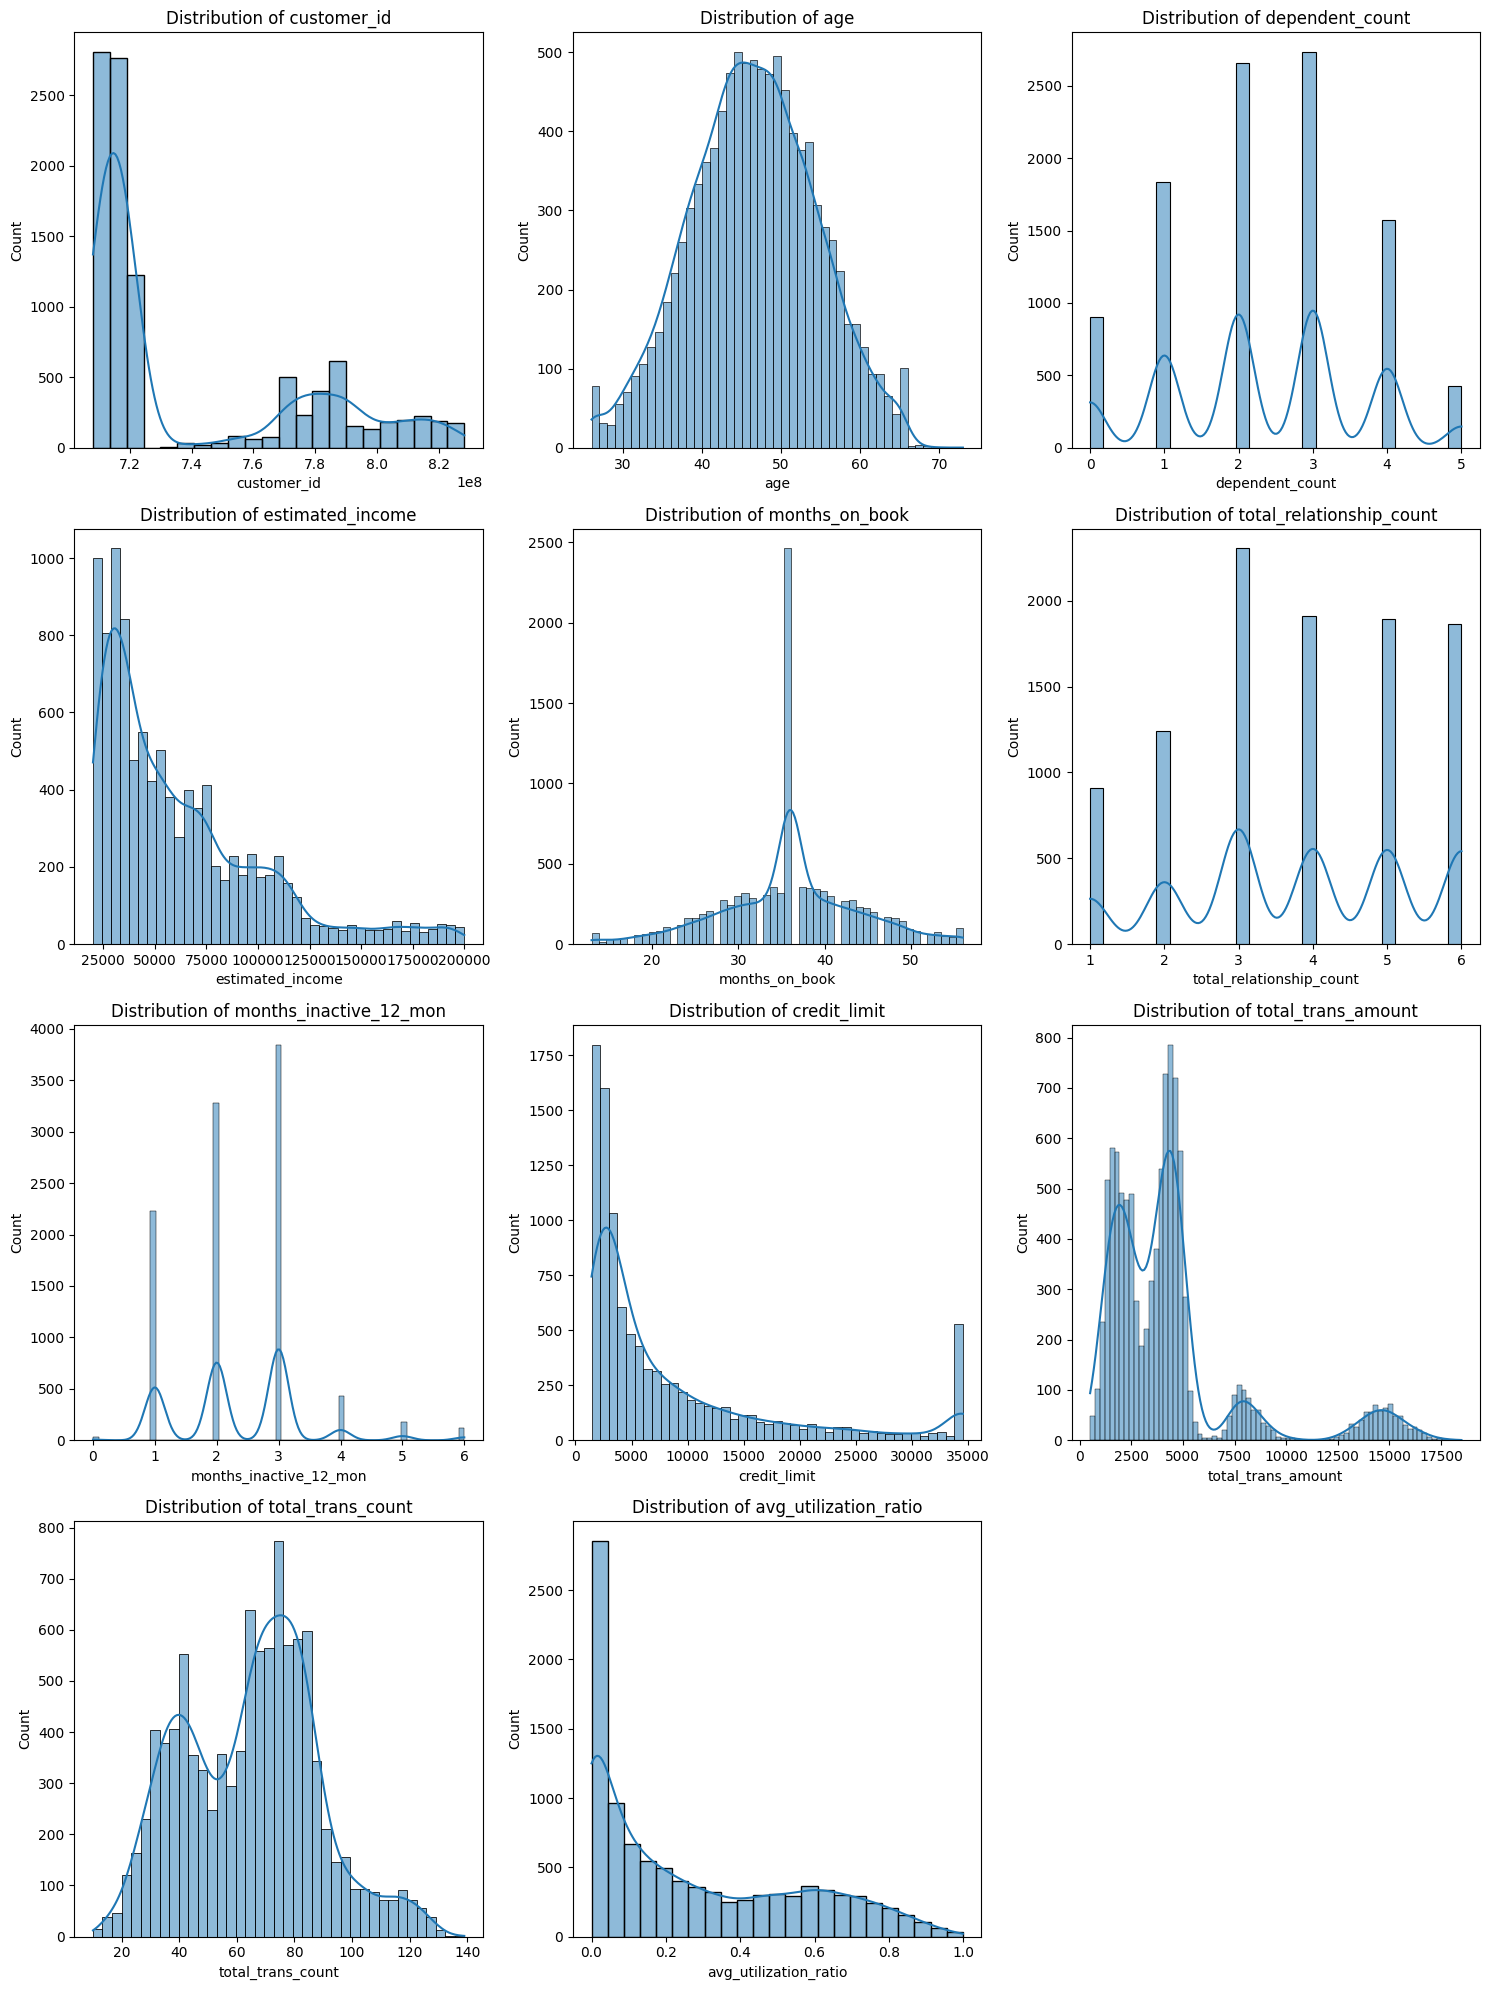

In [100]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()




In [102]:
log_columns = ['total_trans_count', 'avg_utilization_ratio', 'total_trans_amount', 'credit_limit', 'estimated_income']
log_renamed_columns = ['log_total_trans_count', 'log_avg_utilization_ratio', 'log_total_trans_amount', 'log_credit_limit', 'log_estimated_income']

for col, log_col in zip(log_columns, log_renamed_columns):
    df[log_col] = np.log(df[col] + 1)  # Adding 1 to avoid log(0)

df_dropped = df.drop(columns=log_columns + ['customer_id'])

df_dropped



,age,gender,dependent_count,education_level,marital_status,months_on_book,total_relationship_count,months_inactive_12_mon,log_total_trans_count,log_avg_utilization_ratio,log_total_trans_amount,log_credit_limit,log_estimated_income
0,45,M,3,High School,Married,39,5,1,3.761200,0.059212,7.043160,9.448727,11.141876
1,49,F,5,Graduate,Single,44,6,1,3.526361,0.099845,7.163947,9.018817,10.085851
2,51,M,3,Graduate,Married,36,4,1,3.044522,0.000000,7.543273,8.137103,11.440366
3,40,F,4,High School,Unknown,34,3,4,3.044522,0.565314,7.066467,8.105911,10.518700
4,40,M,3,Uneducated,Married,21,5,1,3.367296,0.000000,6.705639,8.458928,11.082158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,40,3,2,4.770685,0.379805,9.647110,8.295049,10.839601
10123,41,M,2,Graduate,Divorced,25,4,2,4.248495,0.412772,9.078522,8.361241,10.596660
10124,44,F,1,High School,Married,36,5,3,4.110874,0.000000,9.239122,8.596004,10.404293
10125,30,M,2,Graduate,Unknown,36,4,3,4.143135,0.000000,9.035511,8.572060,10.757924


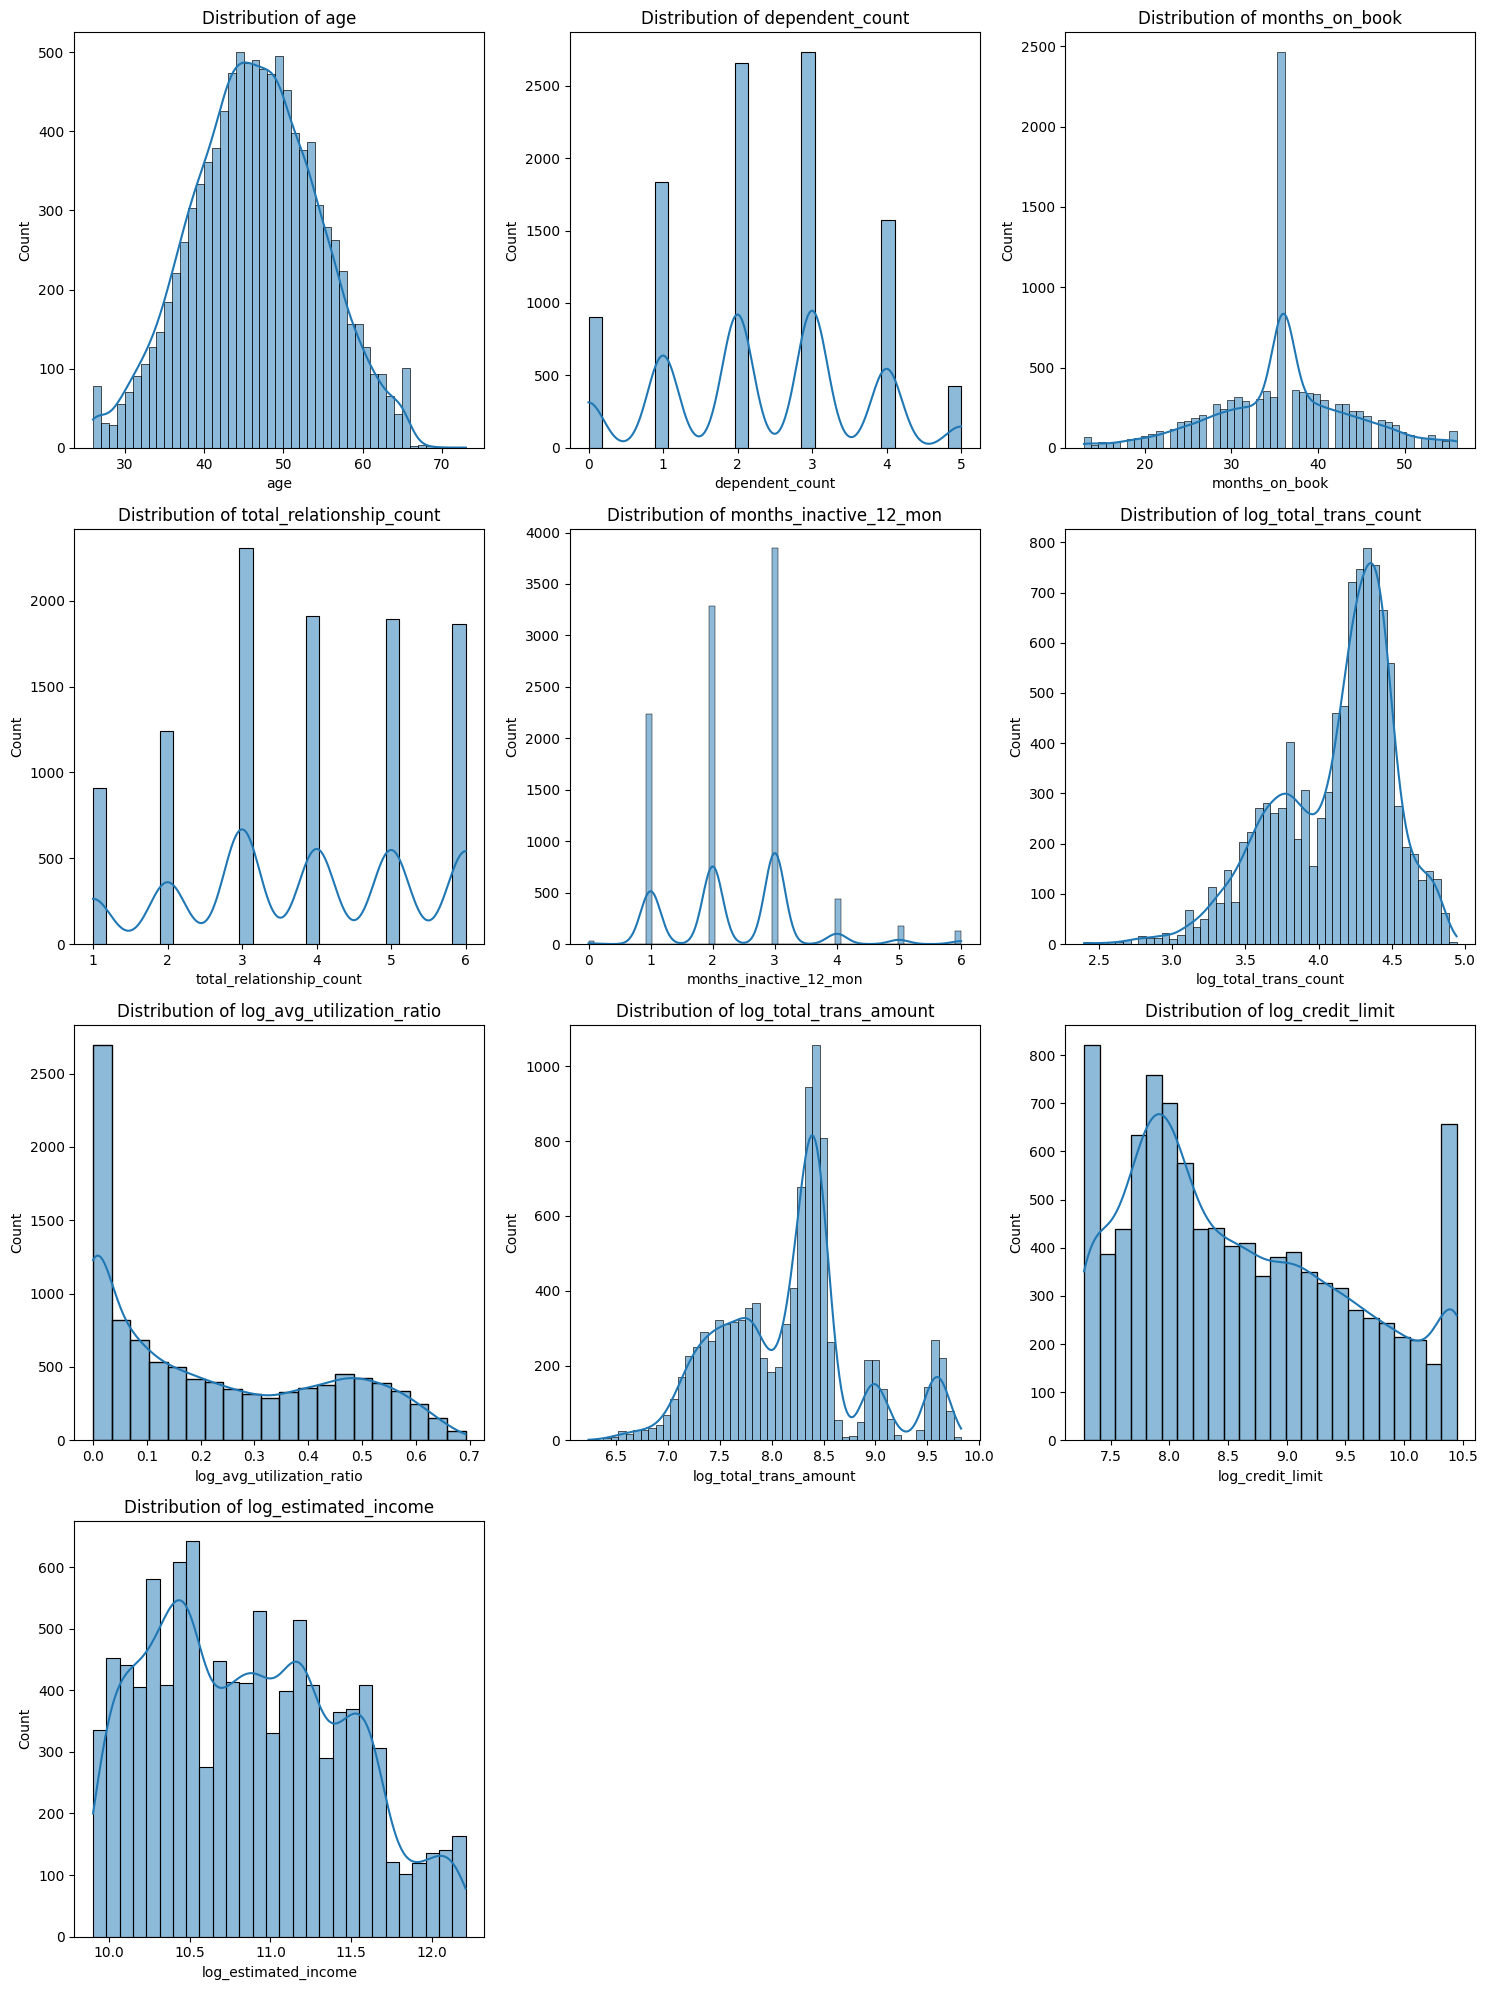

In [103]:
numeric_columns = df_dropped.select_dtypes(include=[np.number]).columns

num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

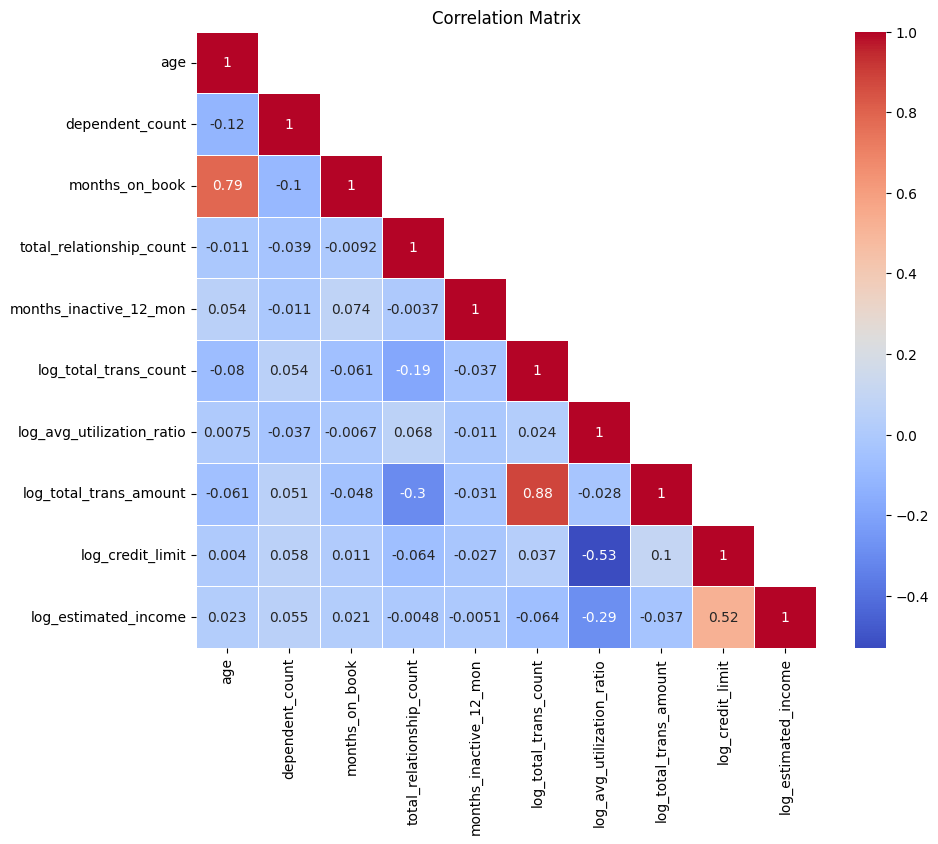

In [104]:
correlation_matrix = df_dropped.corr()


plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [105]:
customers_modif = df_dropped.copy()

# Replace values in the gender column with 1 for "M" and 0 for "F"
customers_modif['gender'] = customers_modif['gender'].map({'M': 1, 'F': 0})

# Replace values in the education_level column with the specified order
education_level_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}
customers_modif['education_level'] = customers_modif['education_level'].map(education_level_mapping)

# Verify the changes
print(customers_modif[['gender', 'education_level']].head())

# Display some summary statistics to ensure the changes were successful
print(customers_modif[['gender', 'education_level']].describe())


   gender  education_level
0       1                1
1       0                3
2       1                3
3       0                1
4       1                0
             gender  education_level
count  10127.000000     10127.000000
mean       0.470919         2.063197
std        0.499178         1.413499
min        0.000000         0.000000
25%        0.000000         1.000000
50%        0.000000         2.000000
75%        1.000000         3.000000
max        1.000000         5.000000


In [106]:
marital_status_dummies = pd.get_dummies(customers_modif['marital_status'], prefix='marital_status')

customers_modif = pd.concat([customers_modif, marital_status_dummies], axis=1)

customers_modif.drop(columns=['marital_status'], inplace=True)

print(customers_modif)


       age  gender  dependent_count  education_level  months_on_book  \
0       45       1                3                1              39   
1       49       0                5                3              44   
2       51       1                3                3              36   
3       40       0                4                1              34   
4       40       1                3                0              21   
...    ...     ...              ...              ...             ...   
10122   50       1                2                3              40   
10123   41       1                2                3              25   
10124   44       0                1                1              36   
10125   30       1                2                3              36   
10126   43       0                2                3              25   

       total_relationship_count  months_inactive_12_mon  \
0                             5                       1   
1                

In [107]:
customers_modif

,age,gender,dependent_count,education_level,months_on_book,total_relationship_count,months_inactive_12_mon,log_total_trans_count,log_avg_utilization_ratio,log_total_trans_amount,log_credit_limit,log_estimated_income,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,39,5,1,3.761200,0.059212,7.043160,9.448727,11.141876,0,1,0,0
1,49,0,5,3,44,6,1,3.526361,0.099845,7.163947,9.018817,10.085851,0,0,1,0
2,51,1,3,3,36,4,1,3.044522,0.000000,7.543273,8.137103,11.440366,0,1,0,0
3,40,0,4,1,34,3,4,3.044522,0.565314,7.066467,8.105911,10.518700,0,0,0,1
4,40,1,3,0,21,5,1,3.367296,0.000000,6.705639,8.458928,11.082158,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,3,40,3,2,4.770685,0.379805,9.647110,8.295049,10.839601,0,0,1,0
10123,41,1,2,3,25,4,2,4.248495,0.412772,9.078522,8.361241,10.596660,1,0,0,0
10124,44,0,1,1,36,5,3,4.110874,0.000000,9.239122,8.596004,10.404293,0,1,0,0
10125,30,1,2,3,36,4,3,4.143135,0.000000,9.035511,8.572060,10.757924,0,0,0,1


In [108]:
scaler = StandardScaler()

# Fit the scaler to the DataFrame and transform the data
scaled_data = scaler.fit_transform(customers_modif)

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=customers_modif.columns)

# Print the scaled DataFrame
print(scaled_df.head())

# Display some summary statistics to ensure the changes were successful
print(scaled_df.describe())



        age    gender  dependent_count  education_level  months_on_book  \
0 -0.165406  1.059956         0.503368        -0.752211        0.384621   
1  0.333570 -0.943436         2.043199         0.662787        1.010715   
2  0.583058  1.059956         0.503368         0.662787        0.008965   
3 -0.789126 -0.943436         1.273283        -0.752211       -0.241473   
4 -0.789126  1.059956         0.503368        -1.459710       -1.869317   

   total_relationship_count  months_inactive_12_mon  log_total_trans_count  \
0                  0.763943               -1.327136              -0.876013   
1                  1.407306               -1.327136              -1.458910   
2                  0.120579               -1.327136              -2.654883   
3                 -0.522785                1.641478              -2.654883   
4                  0.763943               -1.327136              -1.853725   

   log_avg_utilization_ratio  log_total_trans_amount  log_credit_limit  \
0     

1
2
3
4
5
6
7
8
9
10


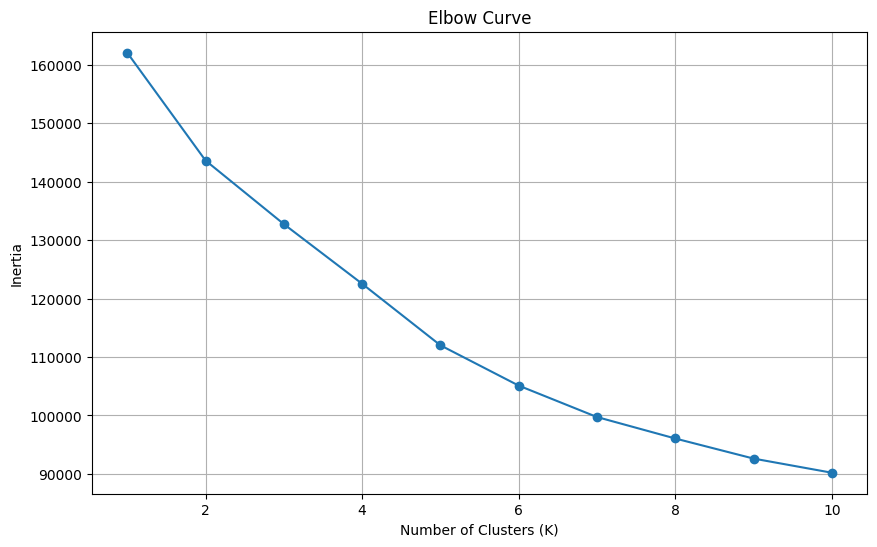

In [109]:

# Create an empty list to store the inertia values
inertia_values = []

# Loop through different numbers of clusters (K)
for k in range(1, 11):
    print(k)
    # Instantiate a KMeans object with n_clusters=k
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model and predict the clusters
    kmeans.fit(scaled_df)
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [110]:
optimal_clusters = 4

# Instantiate a new KMeans object with the decided number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)

# Fit the model and predict the clusters
clusters = kmeans_optimal.fit_predict(scaled_df)

# Add the cluster labels to the original DataFrame
customers_modif['CLUSTER'] = clusters

# Print the outcome
print(customers_modif.head())

# Display some summary statistics to ensure the clustering was successful



   age  gender  dependent_count  education_level  months_on_book  \
0   45       1                3                1              39   
1   49       0                5                3              44   
2   51       1                3                3              36   
3   40       0                4                1              34   
4   40       1                3                0              21   

   total_relationship_count  months_inactive_12_mon  log_total_trans_count  \
0                         5                       1               3.761200   
1                         6                       1               3.526361   
2                         4                       1               3.044522   
3                         3                       4               3.044522   
4                         5                       1               3.367296   

   log_avg_utilization_ratio  log_total_trans_amount  log_credit_limit  \
0                   0.059212                7.04

In [111]:
print(customers_modif['CLUSTER'].value_counts())

0    3216
2    3095
1    3067
3     749
Name: CLUSTER, dtype: int64


In [112]:
original_df['CLUSTER'] = customers_modif['CLUSTER']
original_df.drop(columns=['customer_id'], inplace = True)
original_df

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,1
1,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,2
2,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,1
3,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,3
4,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,2
10123,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,2
10124,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,0
10125,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,3


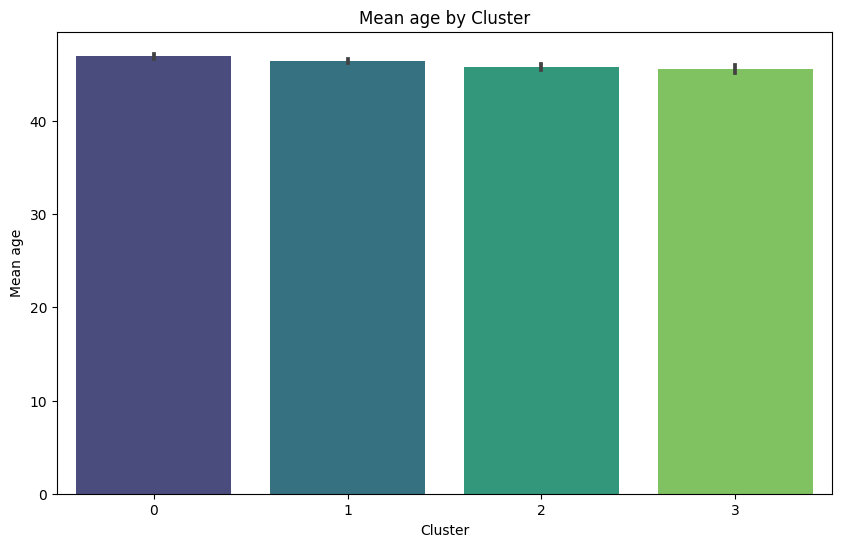

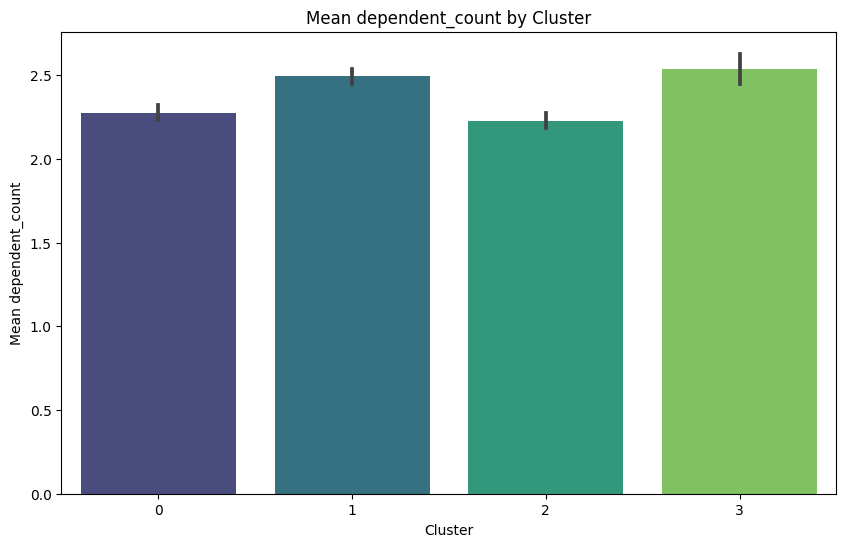

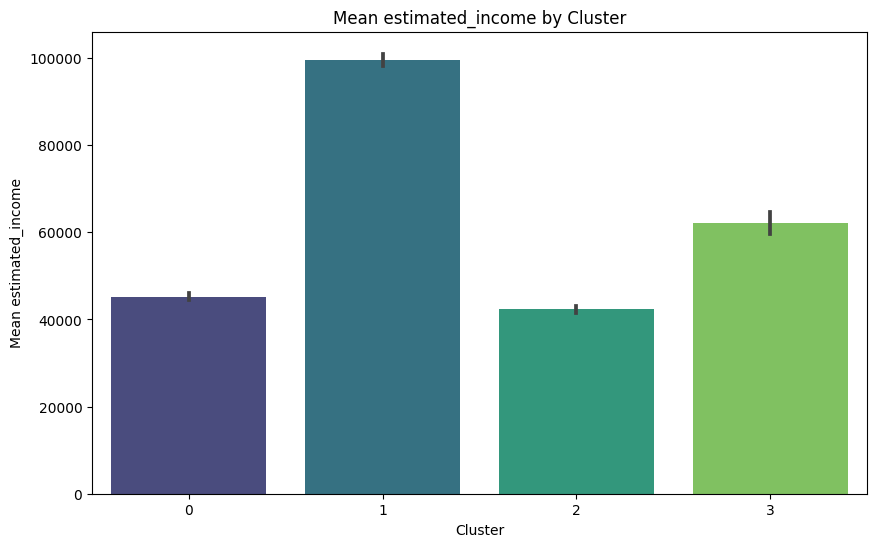

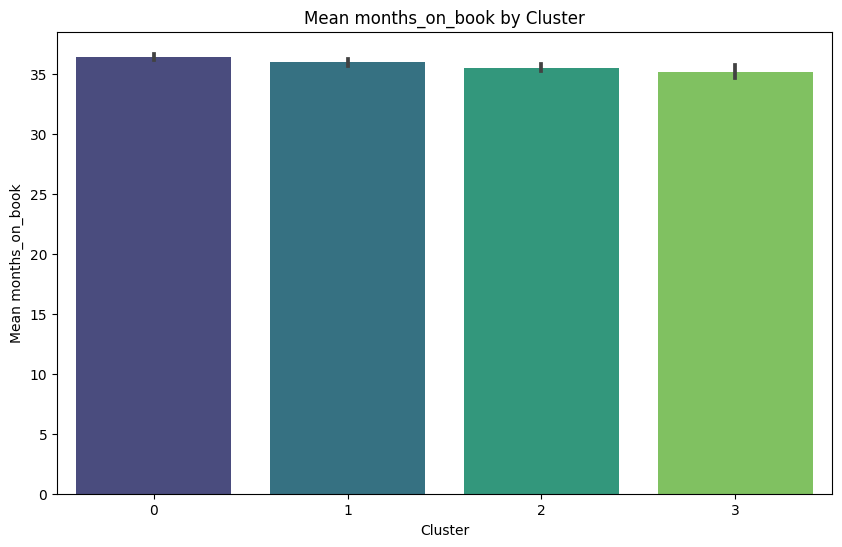

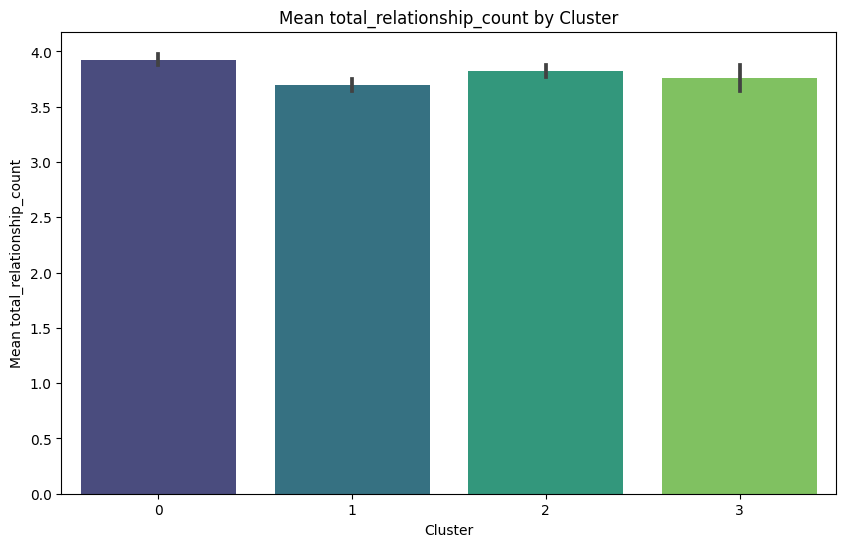

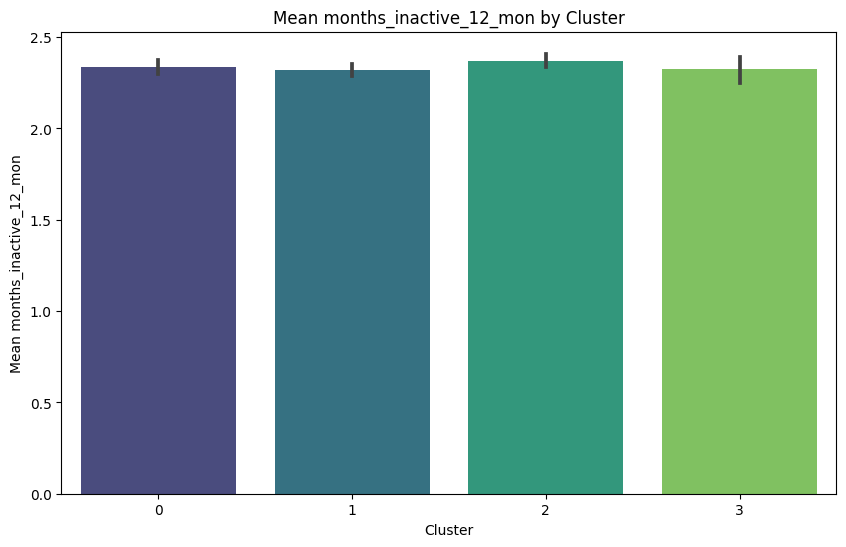

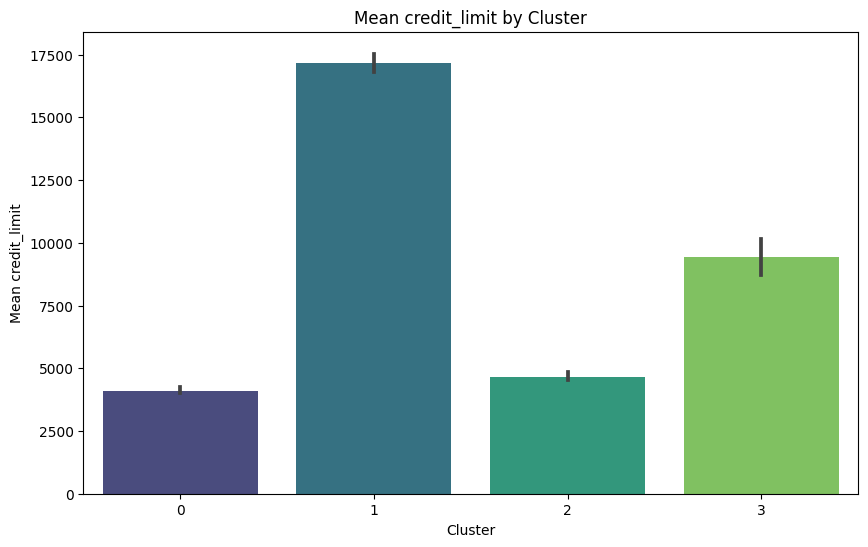

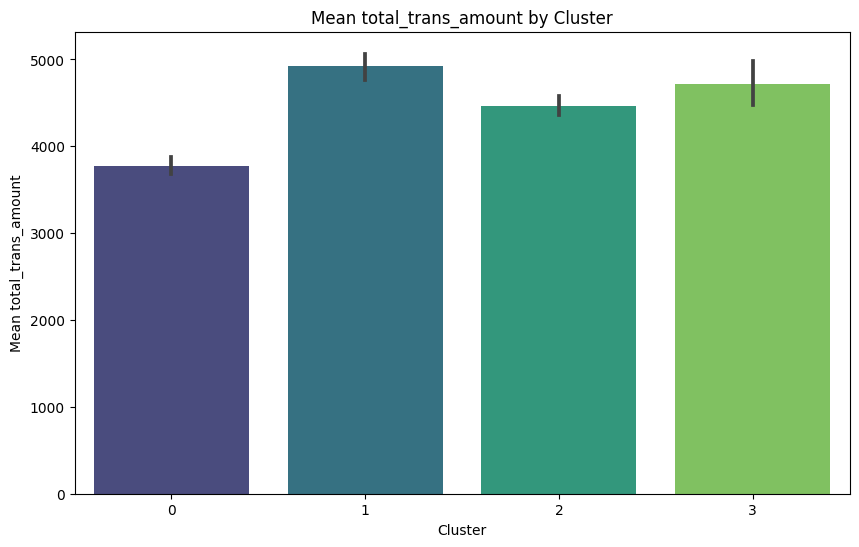

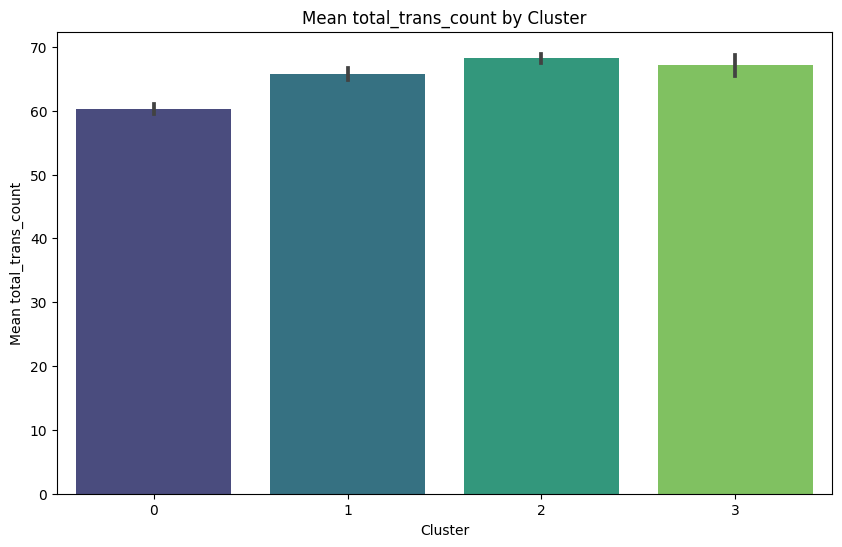

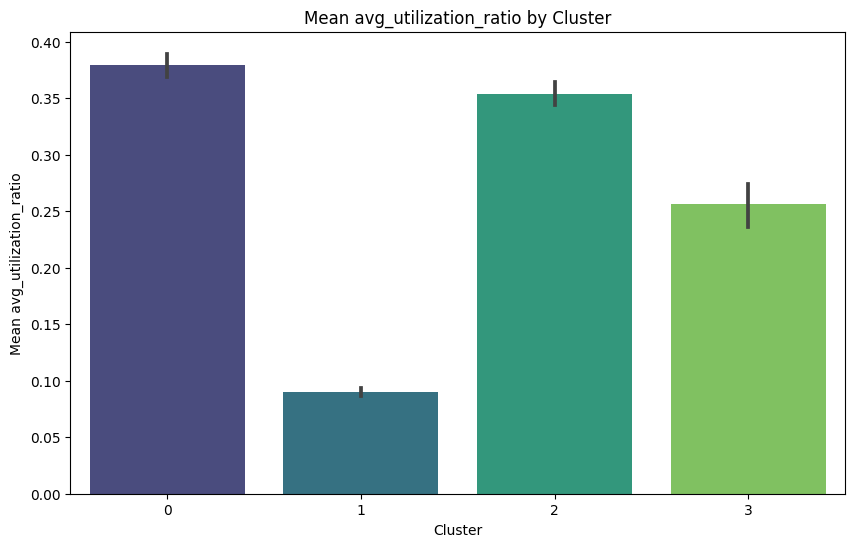

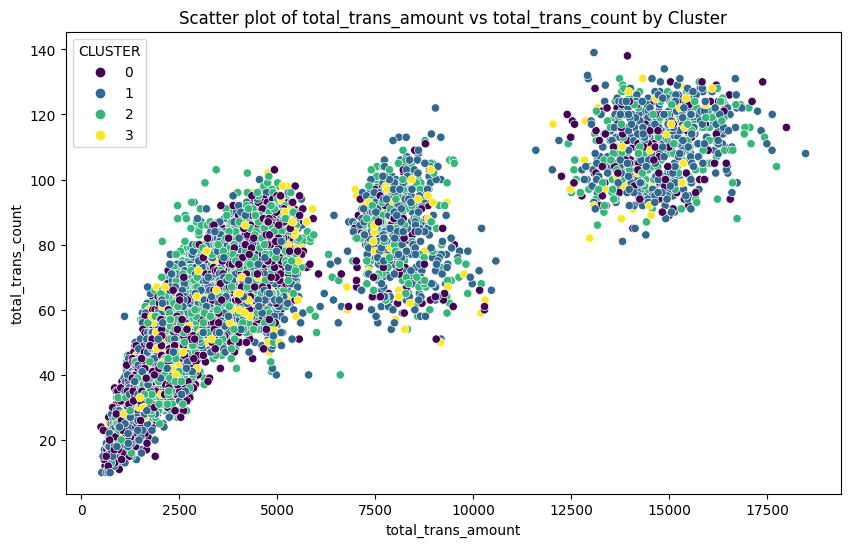

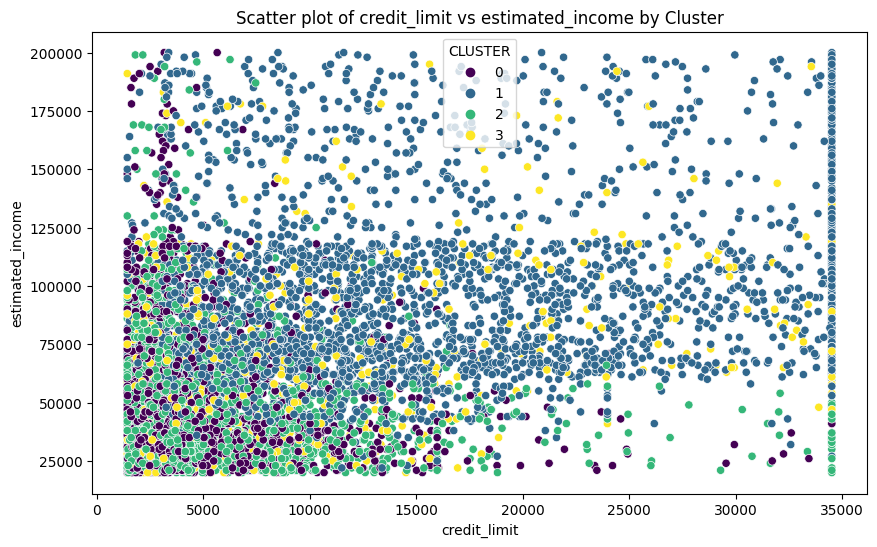

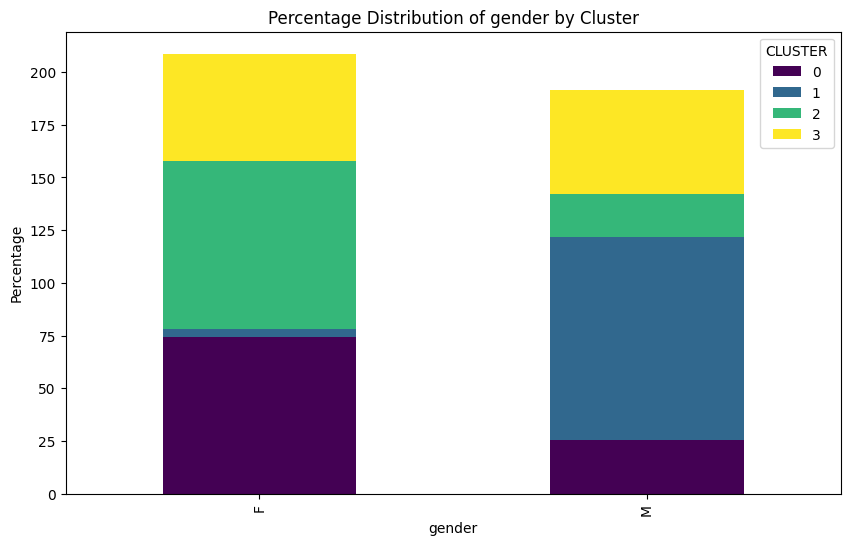

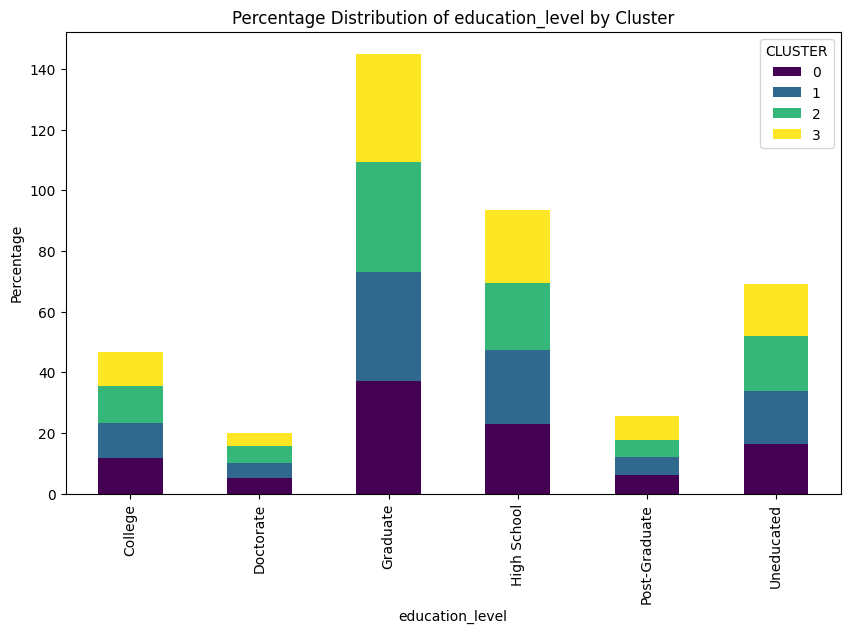

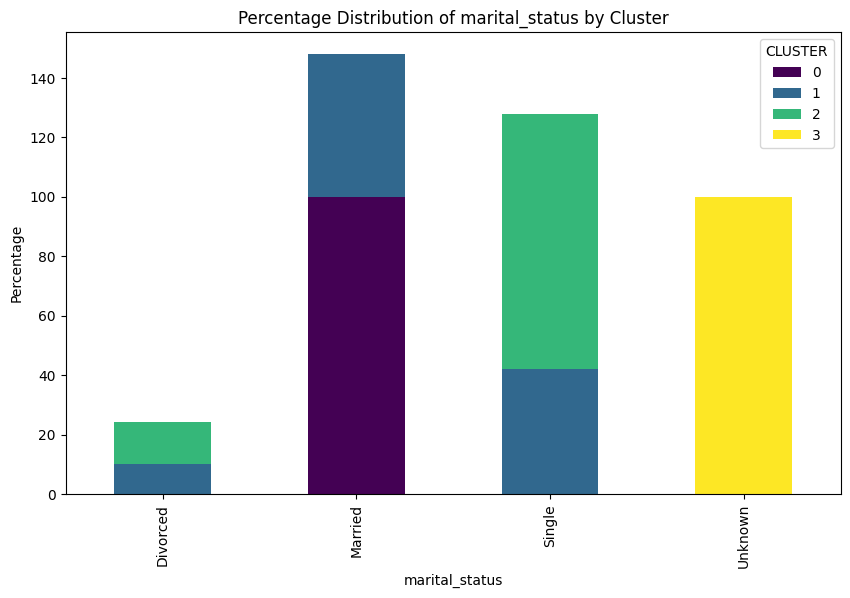

Cluster 0 Characteristics:
  Mean age: 46.92
  Mean dependent_count: 2.27
  Mean estimated_income: 45219.84
  Mean months_on_book: 36.44
  Mean total_relationship_count: 3.93
  Mean months_inactive_12_mon: 2.34
  Mean credit_limit: 4112.90
  Mean total_trans_amount: 3776.74
  Mean total_trans_count: 60.25
  Mean avg_utilization_ratio: 0.38
  Mode gender: F
  Mode education_level: Graduate
  Mode marital_status: Married


Cluster 1 Characteristics:
  Mean age: 46.42
  Mean dependent_count: 2.49
  Mean estimated_income: 99677.21
  Mean months_on_book: 35.97
  Mean total_relationship_count: 3.70
  Mean months_inactive_12_mon: 2.32
  Mean credit_limit: 17168.29
  Mean total_trans_amount: 4919.79
  Mean total_trans_count: 65.77
  Mean avg_utilization_ratio: 0.09
  Mode gender: M
  Mode education_level: Graduate
  Mode marital_status: Married


Cluster 2 Characteristics:
  Mean age: 45.80
  Mean dependent_count: 2.23
  Mean estimated_income: 42328.27
  Mean months_on_book: 35.54
  Mean total

In [114]:
numeric_columns = original_df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('CLUSTER')  

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='CLUSTER', y=col, data=original_df, palette='viridis')
    plt.title(f'Mean {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {col}')
    plt.show()

# Create a scatter plot with different colors for each cluster of pairs of variables with a high correlation
high_corr_pairs = [('total_trans_amount', 'total_trans_count'), ('credit_limit', 'estimated_income')]

for x, y in high_corr_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue='CLUSTER', data=original_df, palette='viridis')
    plt.title(f'Scatter plot of {x} vs {y} by Cluster')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Calculate the percentual distribution of each variable per cluster for the categorical columns
categorical_columns = original_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    crosstab = pd.crosstab(original_df[col], original_df['CLUSTER'], normalize='columns') * 100
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Percentage Distribution of {col} by Cluster')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.show()

# Analyze the results and provide business suggestions
for cluster in sorted(original_df['CLUSTER'].unique()):
    print(f"Cluster {cluster} Characteristics:")
    cluster_data = original_df[original_df['CLUSTER'] == cluster]
    for col in numeric_columns:
        print(f"  Mean {col}: {cluster_data[col].mean():.2f}")
    for col in categorical_columns:
        print(f"  Mode {col}: {cluster_data[col].mode()[0]}")
    print("\n")
